# hp_file_extractor

## common

In [50]:
import os
import numpy as np
hp_config_format = ['liczba punktów', 'liczba warstw', 'liczba neuronów', 'funkcja aktywacji', 'warstwa wyjściowa']
hp_file_columns = ['hp_config','avg(test)','med(test)','std(test)','max(train)','min(train)']

def hp_config_split(dataframe):
    duplicates = dataframe[dataframe.duplicated(subset=['hp_config'])].copy()
    if duplicates.empty is False:
        print('duplicated hp_configs:', list(duplicates['hp_config']))
    dataframe = dataframe.copy()
    dataframe.drop_duplicates(subset=['hp_config'], inplace=True)
    dataframe[hp_config_format] = dataframe['hp_config'].str.rsplit('-', n=4, expand=True)
    return dataframe

def construct_df_from_history_files(history_dir, metric='loss', tail_size=25):
    # history_dir = DIRECTORY + 'history/'
    hp_file_rows = []
    history_filenames = list(filter(lambda filename: 'history' in filename, os.listdir(history_dir)))
    for history_filename in history_filenames:
        
        history_df = pd.read_csv(history_dir + history_filename)
        val_metric_tail = history_df[f'val_{metric}'][-tail_size:]
        metric_tail = history_df[f'{metric}'][-tail_size:]
        
        new_row = {hp_file_columns[0]:history_filename.rsplit('-', 1)[0],hp_file_columns[1]:np.average(val_metric_tail),hp_file_columns[2]:np.median(val_metric_tail),hp_file_columns[3]:np.std(val_metric_tail),hp_file_columns[4]:np.max(metric_tail),hp_file_columns[5]:np.min(metric_tail)}
        hp_file_rows.append(new_row)

    hp_df = pd.DataFrame(hp_file_rows, columns=hp_file_columns)
    hp_df = hp_config_split(hp_df)
    hp_df = hp_df[hp_config_format + hp_file_columns[1:]]
    return hp_df

## q_hp

In [103]:
def q_hp_df_transform(df, sort_by='med(test)'):
    df = df[~df['hp_config'].str.contains('selu')]
    
    df[['topologia sieci', 'funkcja aktywacji']] = df['hp_config'].str.rsplit('-', n=1, expand=True)
    df.rename(columns={'val_acc-med': 'med(test)', 'train_acc-max': 'max(train)', 'val_acc-std': 'std(test)'}, inplace=True)
    df = df[['topologia sieci', 'funkcja aktywacji', 'max(train)', 'med(test)', 'std(test)']]

    df['topologia sieci'] = df['topologia sieci'].str.replace('-','x')
    df['funkcja aktywacji'] = df['funkcja aktywacji'].str.replace('_','\_')
    
    return df.sort_values(sort_by, ascending=False)

In [104]:
DIRECTORY = '/host/dissertation/trained_models/1698862739/'

import pandas as pd
raw_q_hp_df = pd.read_csv(DIRECTORY + 'q_hp.csv')
print(len(raw_q_hp_df))
raw_q_hp_df

54


,hp_config,time,val_acc-avg,val_acc-med,val_acc-std,train_acc-max,train_acc-min
0,1-32-pol_tanh,18:21:35,0.500459,0.499694,0.008469,0.528539,0.514767
1,1-32-pol_sigmoid,18:23:55,0.496053,0.496022,0.008248,0.522724,0.510941
2,1-32-pol_selu,18:26:15,0.496695,0.497858,0.009290,0.514461,0.487070
3,1-32-cart_sigmoid,18:28:28,0.500979,0.500306,0.008025,0.535425,0.516756
4,1-32-cart_relu,18:30:42,0.898592,0.899939,0.030378,0.931140,0.922571
5,1-32-cart_tanh,18:32:56,0.507987,0.509180,0.009417,0.526090,0.507269
6,1-64-pol_tanh,18:35:19,0.504927,0.506732,0.009409,0.519204,0.501607
7,1-64-pol_sigmoid,18:37:42,0.495716,0.500306,0.011668,0.525784,0.511400
8,1-64-pol_selu,18:40:06,0.502326,0.504896,0.011262,0.512777,0.477429
9,1-64-cart_sigmoid,18:42:22,0.500979,0.503672,0.011185,0.538332,0.525325


In [111]:
transformed_df = q_hp_df_transform(raw_q_hp_df)
print(len(transformed_df))
transformed_df

45


/tmp/ipykernel_90/3615832989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['topologia sieci', 'funkcja aktywacji']] = df['hp_config'].str.rsplit('-', n=1, expand=True)
/tmp/ipykernel_90/3615832989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['topologia sieci', 'funkcja aktywacji']] = df['hp_config'].str.rsplit('-', n=1, expand=True)
/tmp/ipykernel_90/3615832989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

,topologia sieci,funkcja aktywacji,max(train),med(test),std(test)
49,3x96,pol\_sigmoid,0.955317,0.955324,0.041579
25,2x64,pol\_sigmoid,0.958378,0.948592,0.015955
43,3x64,pol\_sigmoid,0.959602,0.948592,0.038028
48,3x96,pol\_tanh,0.958990,0.948286,0.016461
37,3x32,pol\_sigmoid,0.949809,0.945532,0.034321
30,2x96,pol\_tanh,0.957766,0.940024,0.025933
24,2x64,pol\_tanh,0.960673,0.939718,0.017398
31,2x96,pol\_sigmoid,0.950421,0.939718,0.014926
18,2x32,pol\_tanh,0.949809,0.932681,0.019918
19,2x32,pol\_sigmoid,0.941086,0.929621,0.018827


In [120]:
import pandas as pd
import numpy as np
import os

TAIL_SIZE = 25

hp_file_rows = []
history_filenames = list(filter(lambda filename: 'history' in filename, os.listdir(DIRECTORY)))
for history_filename in history_filenames:
    
    history_df = pd.read_csv(DIRECTORY + history_filename)
    val_accuracy_tail = history_df['val_accuracy'][-TAIL_SIZE:]
    accuracy_tail = history_df['accuracy'][-TAIL_SIZE:]
    
    new_row = {'hp_config':history_filename.rsplit('-', 1)[0],'val_acc-avg':np.average(val_accuracy_tail),'val_acc-med':np.median(val_accuracy_tail),'val_acc-std':np.std(val_accuracy_tail),'train_acc-max':np.max(accuracy_tail),'train_acc-min':np.min(accuracy_tail)}
    hp_file_rows.append(new_row)

hp_file_columns = ['hp_config','time','val_acc-avg','val_acc-med','val_acc-std','train_acc-max','train_acc-min']
q_hp_df = pd.DataFrame(hp_file_rows, columns=hp_file_columns)
q_hp_df = q_hp_df_transform(q_hp_df)
q_hp_df

/tmp/ipykernel_90/3615832989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['topologia sieci', 'funkcja aktywacji']] = df['hp_config'].str.rsplit('-', n=1, expand=True)
/tmp/ipykernel_90/3615832989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['topologia sieci', 'funkcja aktywacji']] = df['hp_config'].str.rsplit('-', n=1, expand=True)
/tmp/ipykernel_90/3615832989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

,topologia sieci,funkcja aktywacji,max(train),med(test),std(test)
37,3x96,pol\_sigmoid,0.955317,0.955936,0.038896
43,2x64,pol\_sigmoid,0.958378,0.951040,0.015628
29,3x64,pol\_sigmoid,0.961285,0.945532,0.036131
47,3x32,pol\_sigmoid,0.949809,0.943696,0.039232
17,2x64,pol\_tanh,0.960673,0.942472,0.016754
38,3x96,pol\_tanh,0.958990,0.941860,0.022858
28,2x96,pol\_sigmoid,0.950421,0.940636,0.013564
51,2x96,pol\_tanh,0.957766,0.937576,0.023368
20,2x32,pol\_tanh,0.949809,0.932069,0.018884
8,2x32,pol\_sigmoid,0.941086,0.930845,0.017599


In [113]:
print(q_hp_df.to_latex(index=False))

\begin{tabular}{llrrr}
\toprule
topologia sieci & funkcja aktywacji & max(train) & med(test) & std(test) \\
\midrule
3x96 & pol\_sigmoid & 0.955777 & 0.952264 & 0.034456 \\
3x64 & pol\_sigmoid & 0.962357 & 0.950428 & 0.030291 \\
2x64 & pol\_sigmoid & 0.958378 & 0.946450 & 0.018809 \\
3x32 & pol\_sigmoid & 0.949809 & 0.944002 & 0.034829 \\
2x96 & pol\_sigmoid & 0.950421 & 0.941860 & 0.012459 \\
3x96 & pol\_tanh & 0.958990 & 0.941248 & 0.021907 \\
2x64 & pol\_tanh & 0.960673 & 0.940942 & 0.014900 \\
2x96 & pol\_tanh & 0.957766 & 0.939718 & 0.023327 \\
2x32 & pol\_sigmoid & 0.941086 & 0.930233 & 0.022880 \\
2x32 & pol\_tanh & 0.949809 & 0.929621 & 0.017346 \\
2x64 & cart\_relu & 0.952257 & 0.928703 & 0.028905 \\
3x64 & pol\_tanh & 0.947360 & 0.926867 & 0.032479 \\
1x64 & cart\_relu & 0.938791 & 0.925031 & 0.037499 \\
3x96 & cart\_relu & 0.959296 & 0.922277 & 0.022435 \\
3x32 & cart\_relu & 0.955317 & 0.920441 & 0.026247 \\
1x96 & cart\_relu & 0.946136 & 0.918605 & 0.031922 \\
2x96 & cart\

## phi_hp

In [10]:
def phi_hp_df_transform(df, sort_by='med(test)'):
    df = df[~df['hp_config'].str.contains('selu')]
    
    df[['topologia sieci', 'funkcja aktywacji']] = df['hp_config'].str.rsplit('-', n=1, expand=True)
    df.rename(columns={'val_loss-med': 'med(test)', 'train_loss-max': 'max(train)', 'val_loss-std': 'std(test)'}, inplace=True)
    df = df[['topologia sieci', 'funkcja aktywacji', 'max(train)', 'med(test)', 'std(test)']]

    df['topologia sieci'] = df['topologia sieci'].str.replace('-','x')
    df['funkcja aktywacji'] = df['funkcja aktywacji'].str.replace('_','\_')
    
    return df.sort_values(sort_by, ascending=True)

In [11]:
DIRECTORY = '/host/dissertation/trained_models/1699107910/'

import pandas as pd
raw_phi_hp_df = pd.read_csv(DIRECTORY + 'q_hp.csv')
print(len(raw_phi_hp_df))
raw_phi_hp_df

180


,hp_config,time,val_loss-avg,val_loss-med,val_loss-std,train_loss-max,train_loss-min
0,3-1-32-pol_tanh,14:30:36,0.006191,0.006060,0.001343,0.005443,0.004963
1,3-1-32-pol_sigmoid,14:36:03,0.005580,0.004447,0.001784,0.005031,0.004581
2,3-1-32-cart_tanh,14:41:17,0.010618,0.010594,0.001262,0.008679,0.008319
3,3-1-32-cart_sigmoid,14:46:33,0.008264,0.008150,0.001147,0.006412,0.006176
4,3-1-32-cart_relu,14:51:49,0.006021,0.005927,0.000395,0.005601,0.005478
...,...,...,...,...,...,...,...
175,10-3-128-pol_tanh,05:57:18,0.011110,0.011362,0.001784,0.009807,0.009200
176,10-3-128-pol_sigmoid,06:03:56,0.009193,0.009052,0.002868,0.009779,0.009305
177,10-3-128-cart_tanh,06:10:03,0.020300,0.019517,0.002261,0.019829,0.018372
178,10-3-128-cart_sigmoid,06:16:11,0.018669,0.018501,0.002648,0.014748,0.014028


In [13]:
transformed_df = phi_hp_df_transform(raw_phi_hp_df)
print(len(transformed_df))
transformed_df[:30]

180


,topologia sieci,funkcja aktywacji,max(train),med(test),std(test)
1,3x1x32,pol\_sigmoid,0.005031,0.004447,0.001784
6,3x1x64,pol\_sigmoid,0.005271,0.005019,0.002429
20,3x2x32,pol\_tanh,0.005842,0.005190,0.002229
10,3x1x96,pol\_tanh,0.005154,0.005240,0.001499
30,3x2x96,pol\_tanh,0.005652,0.005262,0.002339
35,3x2x128,pol\_tanh,0.005815,0.005346,0.001118
16,3x1x128,pol\_sigmoid,0.005292,0.005373,0.001905
31,3x2x96,pol\_sigmoid,0.005889,0.005400,0.001746
15,3x1x128,pol\_tanh,0.005277,0.005490,0.001665
5,3x1x64,pol\_tanh,0.005282,0.005522,0.001698


In [23]:
# import sys
# sys.path.append('/host/dissertation/common')

1st percentile of train loss:       4.7381e-03
1st percentile of validation loss:  4.1212e-03


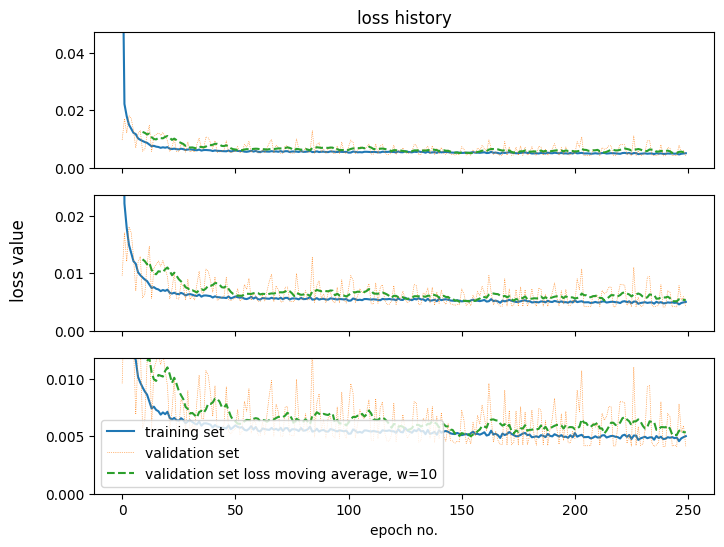

In [34]:
from common.plot import plot_metric_history, plot_metric_history_zoomed
history_df = pd.read_csv(DIRECTORY + 'history/3-1-32-pol_sigmoid-history.csv')

plot_metric_history_zoomed(history_df)

In [41]:
import pandas as pd
import numpy as np
import os

TAIL_SIZE = 25
HISTORY_DIR = DIRECTORY + 'history/'

hp_file_rows = []
history_filenames = list(filter(lambda filename: 'history' in filename, os.listdir(HISTORY_DIR)))
for history_filename in history_filenames:
    
    history_df = pd.read_csv(HISTORY_DIR + history_filename)
    val_loss_tail = history_df['val_loss'][-TAIL_SIZE:]
    loss_tail = history_df['loss'][-TAIL_SIZE:]
    
    new_row = {'hp_config':history_filename.rsplit('-', 1)[0],'val_loss-avg':np.average(val_loss_tail),'val_loss-med':np.median(val_loss_tail),'val_loss-std':np.std(val_loss_tail),'train_loss-max':np.max(loss_tail),'train_loss-min':np.min(loss_tail)}
    hp_file_rows.append(new_row)

hp_file_columns = ['hp_config','time','val_loss-avg','val_loss-med','val_loss-std','train_loss-max','train_loss-min']
phi_hp_df = pd.DataFrame(hp_file_rows, columns=hp_file_columns)
phi_hp_df = phi_hp_df_transform(phi_hp_df)
phi_hp_df

,topologia sieci,funkcja aktywacji,max(train),med(test),std(test)
8,3x1x32,pol\_sigmoid,0.005071,0.004419,0.001992
35,3x1x64,pol\_sigmoid,0.005474,0.005048,0.002277
83,3x2x96,pol\_tanh,0.005702,0.005152,0.002164
54,3x1x64,pol\_tanh,0.005282,0.005208,0.001705
150,3x2x32,pol\_tanh,0.005842,0.005234,0.002214
...,...,...,...,...,...
44,10x3x32,cart\_sigmoid,0.027048,0.029575,0.002569
116,10x2x32,cart\_sigmoid,0.028502,0.030391,0.001101
133,10x3x32,cart\_tanh,0.032770,0.032763,0.001431
121,10x1x32,cart\_tanh,0.033277,0.032763,0.001155


## advanced ConfigsTester format

In [56]:
df = construct_df_from_history_files('/host/dissertation/trained_models/1699385259/history/', metric='accuracy', tail_size=25)
df.sort_values('med(test)', ascending=False)

,liczba punktów,liczba warstw,liczba neuronów,funkcja aktywacji,warstwa wyjściowa,avg(test),med(test),std(test),max(train),min(train)
10,6,3,128,pol_sigmoid,softmax_real_with_abs,0.831065,0.853121,0.061560,0.859373,0.838409
48,6,2,32,pol_sigmoid,softmax_real_with_abs,0.837430,0.851897,0.067173,0.879878,0.850956
89,6,3,128,pol_tanh,softmax_real_with_mult,0.843403,0.851285,0.040766,0.847743,0.828003
58,6,3,64,pol_sigmoid,softmax_real_with_abs,0.827809,0.851285,0.065612,0.861362,0.844989
49,6,3,64,pol_tanh,softmax_real_with_avg,0.832460,0.848837,0.053458,0.867024,0.849426
...,...,...,...,...,...,...,...,...,...,...
53,6,3,64,cart_relu,softmax_of_softmax_real_with_avg,0.494492,0.494492,0.000000,0.499311,0.499311
99,6,3,128,cart_relu,softmax_of_softmax_real_with_mult,0.494492,0.494492,0.000000,0.499311,0.499311
74,6,3,64,cart_relu,softmax_real_with_polar,0.494492,0.494492,0.000000,0.499311,0.499311
25,6,3,128,cart_relu,softmax_real_with_mult,0.494492,0.494492,0.000000,0.499311,0.499311
